# Predicting Housing Prices- Understanding Basics of Linear Regression Model

In the following project, we build a Machine Leanring model to predict the final sales prices for houses sold in Ames, Iowa. Our work is based on the dataset originally compiled by Dean De Cock for the primary purpose of having a high quality dataset for regression. 

- Each row in the dataset describes some properties of a single house and the amount for which it was sold. 
- We will try to build a model that predict the final sale price from its other attributes.
    - We will try and find which properties of a house most affects the final sale price?
    - How effectively we can predict the price of the house from just its properties?

Here are some of the columns:
- Lot Area: Lot size in square feet.
- Overall Qual: Rates the overall material and finish of the house.
- Overall Cond: Rates the overall condition of the house.
- Year Built: Original construction date.
- Low Qual Fin SF: Low quality finished square feet (all floors).
- Full Bath: Full bathrooms above grade.
- Fireplaces: Number of fireplaces.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data into a DataFrame
data = pd.read_csv('AmesHousing.txt', delimiter = '\t')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
# Splitting the data into Test and Train

train = data[:1460]
test = data[1460:]

In [4]:
data.info() # Getting informtaion about the data columns and types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

Among the various properties about the houses, SalePrice is out target column. We want to learn and apply Linear Regression techniques to predict the SaleProce of the house sold in Ames, Iowa.

We will start off by understanding the univariate case of linear regression also called as 'simple linear regression'. The following equation is the general form of the simple linear regression model- 

y = a1x1 + a0

- y is the target column and x1 is the feature column. These are independent of the dataset. 
- a1 and a0 are parameters which are specific to the dataset. 

Our goal in understanding the simple linear regression is to find the optimal parameter values which best describes the relationship between the feature and target column. 

- First step is to select a feature which we want to use in our model.

-  Now, our assumptions of linear regression is that the relationship between the feature and the target column is linear, we want to pick a feature that seems like it has the strongest correlation with the target sale price.

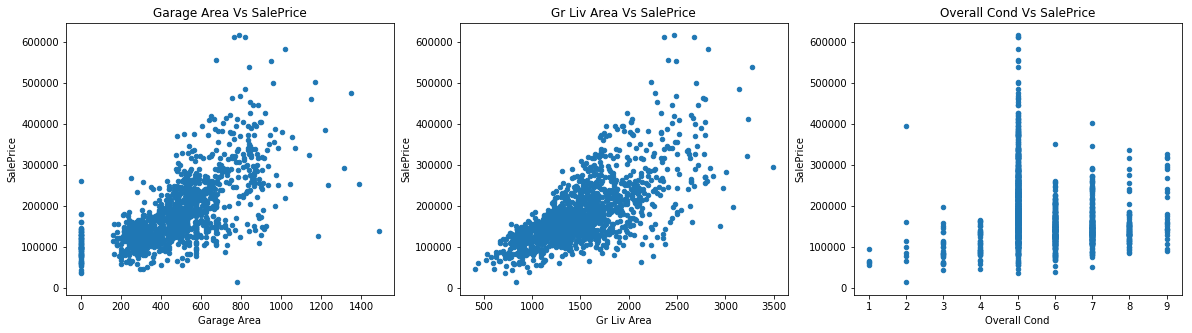

In [5]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

train.plot(x ='Garage Area' , y = 'SalePrice', kind = 'scatter', ax = ax1, title = 'Garage Area Vs SalePrice')
train.plot(x = 'Gr Liv Area', y = 'SalePrice', kind = 'scatter', ax = ax2, title = 'Gr Liv Area Vs SalePrice')
train.plot(x = 'Overall Cond', y = 'SalePrice', kind = 'scatter', ax = ax3, title = 'Overall Cond Vs SalePrice')

plt.show()

Among the few selected features above, we see that Gr Liv Area correlates the most with the SalePrice column. 


In [6]:
# Finding out correlation values

train[['Garage Area','Gr Liv Area','Overall Cond','SalePrice']].corr()

,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.465366,-0.132401,0.662397
Gr Liv Area,0.465366,1.000000,-0.133710,0.698990
Overall Cond,-0.132401,-0.133710,1.000000,-0.099395
SalePrice,0.662397,0.698990,-0.099395,1.000000


So, we modify our model funciton as below - 
- y = a1\**Gr Liv Area* + a0

Now we have to understand the model fitting criteria. 
To find the optimal parameters for our linear regression model, we have to find the optimum *Residual Sum of Squares*. Residual (often referred to as errors) describes the difference between the predicted values for the target column
and the true values.

Finding the optimal residual value is similar to finding the mean squared error (MSE) value. We can use scikit-learn library to find the optimal parameter values for our model.

In [7]:
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()

# Fitting the Linear Regression model for our feature and target column

lrm.fit(train[['Gr Liv Area']], train['SalePrice'])

a1 = lrm.coef_
a0 = lrm.intercept_

print(a1)
print(a0)

[116.86624683]
5366.821710056043


We can now rewrite our linear regression model as  *y* = 116.86624683*x1* + 5366.821710056043

- We can say that for every 1 square foot increase in above ground living area, we can expect the home's value to increase by approximately 116.87 dollars.

We can now predict the labels using the training data and compare them with the actual labels. We can also perform simple validaiton by finding the mean squared error(MSE) for the predicted values. 

In [8]:
from sklearn.metrics import mean_squared_error

# Predicting SalePrices for train and test dataset

train_predictions = lrm.predict(train[['Gr Liv Area']])
test_predictions = lrm.predict(test[['Gr Liv Area']])

# Calculating the mean squared error for the train and test data predicted values
train_mse = mean_squared_error(train_predictions, train[['SalePrice']])
test_mse = mean_squared_error(test_predictions, test[['SalePrice']])

# Calculating the root of the mean squared error values
train_rmse = np.sqrt(train_mse)
test_rmse= np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

56034.362001412796
57088.25161263909


Now that we've explored the basics of simple linear regression, we can extend what we've learned to the multivariate case (often called multiple linear regression).
- A multiple linear regression model allows us to capture the relationship between multiple feature columns and the target column.

The general form of a multiple linear regression model looks like as follows - 
y = a*0*+ a*1*x*1* + a*2*x*2* + a*3*x*3* + ... a*n*x*n*


Let's train a model using the following columns from the dataset to see how train and test RMSE values are improved.
- Overall Cond
- Gr Liv Area

In [9]:
cols = ['Overall Cond','Gr Liv Area']

lrm2 = LinearRegression()
# Fitting the model for training data
lrm2.fit(train[cols],train[['SalePrice']])

a1_2 = lrm2.coef_
a0_2 = lrm2.intercept_

print(a1_2)
print(a0_2)

# Predicting SalePrices for train and test dataset
train_predictions2 = lrm2.predict(train[cols])
test_predictions2 = lrm2.predict(test[cols])

# Calculating the mean squared error for the train and test data predicted values
train_mse2 = mean_squared_error(train_predictions2, train[['SalePrice']])
test_mse2 = mean_squared_error(test_predictions2, test[['SalePrice']])

# Calculating the root of the mean squared error values
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)

print(train_rmse2)
print(test_rmse2)

[[-409.56846611  116.73118339]]
[7858.69114639]
56032.398015258674
57066.90779448559


We can now rewrite our linear regression model as  *y* = -409.56846611*x1* + 116.86624683*x2* + 7858.69114639

The mean squared error values didnt improve much when multiple features were used to fir the linear regression model. When using multiple features, the main challenge is selecting relevant features. 

To get a basic understanding of Linear Regression in a Machine Learning process, we used the data set to build a linear regression model to predict the price of a house using certain featurs. 
- Further learning can be done to find approaches for relevant feature selection.


### Feature Selection

Once we have decided upon a ML model to use, selecting appropriate features for our model is an important task.

In [10]:
# Keeping only float and integer data

train_numeric = train.select_dtypes(include=['float','int'])

# Dropping unuseful columns

col_drop = ['PID','Year Built','Year Remod/Add','Garage Yr Blt','Mo Sold','Yr Sold']
train_numeric.drop(col_drop, axis = 1, inplace = True) 

# Finding columns with no missing data 

null_series = pd.Series(train_numeric.isna().sum())
full_cols_series = null_series[null_series == 0]

train_subset = train[full_cols_series.index]

train_subset.head()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Order,MS SubClass,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
0,1,20,31770,6,5,1656,0,0,1656,1,...,2.0,528.0,210,62,0,0,0,0,0,215000
1,2,20,11622,5,6,896,0,0,896,1,...,1.0,730.0,140,0,0,0,120,0,0,105000
2,3,20,14267,6,6,1329,0,0,1329,1,...,1.0,312.0,393,36,0,0,0,0,12500,172000
3,4,20,11160,7,5,2110,0,0,2110,2,...,2.0,522.0,0,0,0,0,0,0,0,244000
4,5,60,13830,5,5,928,701,0,1629,2,...,2.0,482.0,212,34,0,0,0,0,0,189900


In [11]:
# Finding correlation between the features of the dataset

corr_data= train_subset.corr()
sorted_corr_data = corr_data['SalePrice'].abs().sort_values()

sorted_corr_data

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64

We have a list of candidate features to use in our model, sorted by how strongly they're correlated with the target column - SalePrice. 

We will filter our correlation matrix to keep only the features that have a correlation of 0.3 or higher.
- This number is an arbitrary figure and it's a good idea to experiment with this cutoff. 
- We can train and test models using the columns selected using different cutoffs and see where your model stops improving.

We will also check for  potential collinearity between some of the feature columns. 
- Collinearity is when 2 feature columns are highly correlated and stand the risk of duplicating information. 
- If 2 features convey the same information using 2 different measures or metrics, we don't want to keep both.


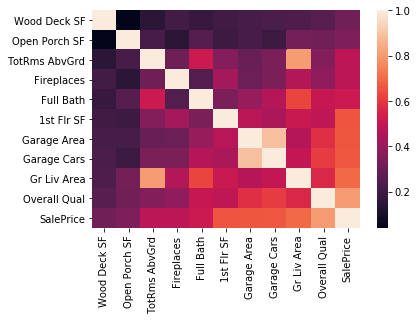

In [160]:
# Finding features that have a correlation of 0.3 or higher.
strong_corr_cols = sorted_corr_data[sorted_corr_data>0.3].index

# Generating a correlation matrix heatmap
corr_data = train_subset[strong_corr_cols].corr()

sns.heatmap(corr_data)

From the above heatmap, we can see that the following set of features are highly correlated-
- Garage Area and Garage Cars
- TotRms AbvGrd and Gr Liv Area

Looking into the data set and the type of data these features represent, we can say that these two pairs of features caputres very similar information. Knowing that, we can drop Garage Cars and TotRms AbvGrd columns from our data set. 

Also, we will cleanse our test data before we rebuild a Linear Regression model using the list of selcted features.

In [161]:
# Dropping Garage Cars,TotRms AbvGrd from the list of columns 

final_corr_cols = strong_corr_cols.drop(['Garage Cars','TotRms AbvGrd'])

# Cleaning the test data
test[final_corr_cols].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
Wood Deck SF     1470 non-null int64
Open Porch SF    1470 non-null int64
Fireplaces       1470 non-null int64
Full Bath        1470 non-null int64
1st Flr SF       1470 non-null int64
Garage Area      1469 non-null float64
Gr Liv Area      1470 non-null int64
Overall Qual     1470 non-null int64
SalePrice        1470 non-null int64
dtypes: float64(1), int64(8)
memory usage: 103.4 KB


Looks like there is one row in the test data with a missing value for Garage Area. We will drop this column before we proceed with our modelling procedure.

In [162]:
# Dropping Garage Area from list of featues. Also droping SalePrice as it is the target column
features = final_corr_cols.drop(['SalePrice'])
target = 'SalePrice'

# Cleaning test data
clean_test = test[final_corr_cols].dropna()


In [163]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lrm_sp = LinearRegression()

lrm_sp.fit(train[features],train[[target]])

# Predicting target values
train_sp_predictions = lrm_sp.predict(train[features])
test_sp_predictions = lrm_sp.predict(clean_test[features])

# Calcualting the Mean Squared Error value
train_sp_mse = mean_squared_error(train_sp_predictions, train[[target]])
test_sp_mse = mean_squared_error(test_sp_predictions, clean_test[[target]])

# Calcualting the Root of the Mean Squared Error value
train_sp_rmse = np.sqrt(train_sp_mse)
test_sp_rmse= np.sqrt(test_sp_mse)

a1_sp = lrm_sp.coef_
a0_sp = lrm_sp.intercept_

print(train_sp_rmse)
print(test_sp_rmse)

34173.97629185852
41032.026120197705


### Removing Features with Low Variance

From the set of selected features, we want to remove the features which have low variance. 
- When the values in a feature column have low variance, they don't meaningfully contribute to the model's predictive capability

Before we remove the features with low variance, we need to rescale all of the columns to vary between 0 and 1. 
- We can then set a cutoff value for variance and remove features that have less than that variance amount.

In [164]:
# Rescaling the columns to vary between 0 and 1

scaled_train = (train[features] - train[features].min())/(train[features].max() - train[features].min())

# Calculating the variance

sorted_vars = scaled_train.var().sort_values()

print(sorted_vars)

Open Porch SF    0.013938
Full Bath        0.018621
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64


Let us set a cutoff variance of 0.015. We will remove the Open Porch SF feature, and train and test a model using the remaining features.

In [165]:
features = features.drop(['Open Porch SF'])

In [167]:
# Linear Regression Model

lrm_sp2 = LinearRegression()
lrm_sp2.fit(train[features],train[[target]])

# Predicting target values for train and test data

train_sp2_predictions = lrm_sp2.predict(train[features])
test_sp2_predictions = lrm_sp2.predict(clean_test[features])

# Calcualting the Mean Squared Error value
train_sp2_mse = mean_squared_error(train_sp2_predictions, train[[target]])
test_sp2_mse = mean_squared_error(test_sp2_predictions, clean_test[[target]])

# Calcualting the Root of Mean Squared Error value
train_sp2_rmse = np.sqrt(train_sp2_mse)
test_sp2_rmse = np.sqrt(test_sp2_mse)

a1_sp2 = lrm_sp2.coef_
a0_sp2 = lrm_sp2.intercept_

print(train_sp2_rmse)
print(test_sp2_rmse)

34372.69670778396
40591.427024377204


We were able to improve the RMSE value to approximately 40591 by removing the Open Porch SF feature. 

So, we can implement machine learning workflow to build the Linear Regression model. To build an accurate model to make predictions, we should use correlated features and identofy the potential collinearity between some of the feature columns. 

Also, we should remove the feature column that have low variance, as they don't meaningfully contribute to the model's predictive capability.